<a href="https://colab.research.google.com/github/ShivaniMareddy/Polynomial_Regression/blob/main/Polynomial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/CarPrice_Assignment.csv'
df=pd.read_csv(path)
print("Dataset Preview")
print(df.head())
x = df[['enginesize']]
y = df['price']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Preview
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4       

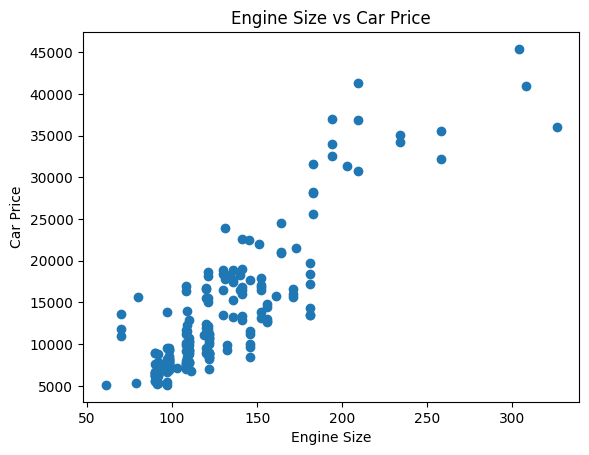

In [4]:
plt.scatter(x, y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()


In [26]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x, y)

y_pred_linear = linear_model.predict(x)
engine_200 = [[200]]

pred_linear_200 = linear_model.predict(engine_200)

print("Predicted price for engine size 200 (Linear):", pred_linear_200[0])


Predicted price for engine size 200 (Linear): 25534.237747489227


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)

poly_model = LinearRegression()
poly_model.fit(x_poly, y)

y_pred_poly = poly_model.predict(x_poly)
engine_200 = [[200]]

engine_200_poly = poly.transform(engine_200)
pred_200 = poly_model.predict(engine_200_poly)

print("Predicted price for engine size 200 (Degree 4):", pred_200[0])


Predicted price for engine size 200 (Degree 4): 28205.13184850081


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


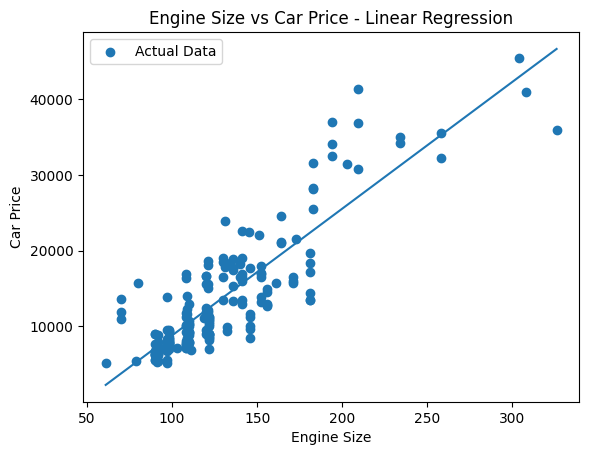

In [28]:
plt.scatter(x, y, label="Actual Data")

# sort for straight line
sorted_zip = sorted(zip(x.values.flatten(), y_pred_linear))
x_sorted, y_linear_sorted = zip(*sorted_zip)

plt.plot(x_sorted, y_linear_sorted)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price - Linear Regression")
plt.legend()
plt.show()



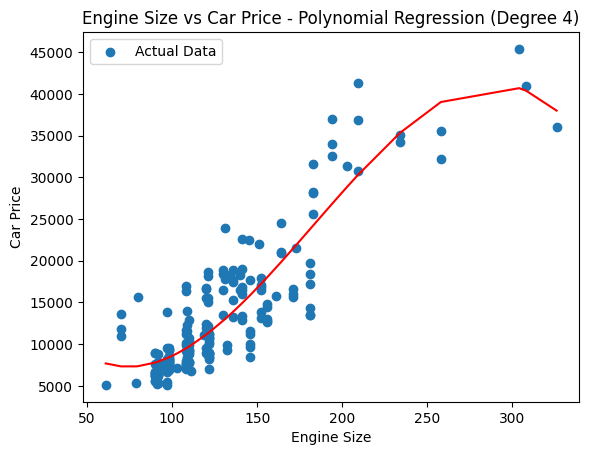

In [29]:
plt.scatter(x, y, label="Actual Data")

# sort for smooth curve
sorted_zip2 = sorted(zip(x.values.flatten(), y_pred_poly))
x_sorted2, y_poly_sorted = zip(*sorted_zip2)

plt.plot(x_sorted2, y_poly_sorted,color='red')
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price - Polynomial Regression (Degree 4)")
plt.legend()
plt.show()


In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("Linear Regression")
print("R2 Score:", r2_score(y, y_pred_linear))
print("MSE:", mean_squared_error(y, y_pred_linear))
print("MAE:", mean_absolute_error(y, y_pred_linear))

print("\nPolynomial Regression (Degree 4)")
print("R2 Score:", r2_score(y, y_pred_poly))
print("MSE:", mean_squared_error(y, y_pred_poly))
print("MAE:", mean_absolute_error(y, y_pred_poly))


Linear Regression
R2 Score: 0.7641291357806176
MSE: 14980261.40555132
MAE: 2815.022353836411

Polynomial Regression (Degree 4)
R2 Score: 0.7938699575522645
MSE: 13091408.850448111
MAE: 2692.9296042010114
